## Problem Statement:
#### I have implemented Feature Scaling, Selection, and Constant Column Removal in Machine Learning with the Breast Cancer Dataset from scikit-learn. you will learn how to preprocess and select features in machine learning using Python.


### Tasks:

##### 1. Import the necessary libraries: Start by importing the required libraries, including pandas, numpy, matplotlib, scikit-learn, and seaborn.

In [1]:
from sklearn import datasets
from sklearn.preprocessing import LabelEncoder
from sklearn.feature_selection import VarianceThreshold
from sklearn.feature_selection import SelectKBest
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

##### 2. Load the dataset: Load the breast cancer dataset into a pandas DataFrame using the load_breast_cancer() function from scikit-learn (sklearn.datasets()).

In [3]:
breast_Cancer_Dataset = datasets.load_breast_cancer()

In [4]:
breast_Cancer_Dataset.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])

In [5]:
breast_Cancer_Dataset['data']

array([[1.799e+01, 1.038e+01, 1.228e+02, ..., 2.654e-01, 4.601e-01,
        1.189e-01],
       [2.057e+01, 1.777e+01, 1.329e+02, ..., 1.860e-01, 2.750e-01,
        8.902e-02],
       [1.969e+01, 2.125e+01, 1.300e+02, ..., 2.430e-01, 3.613e-01,
        8.758e-02],
       ...,
       [1.660e+01, 2.808e+01, 1.083e+02, ..., 1.418e-01, 2.218e-01,
        7.820e-02],
       [2.060e+01, 2.933e+01, 1.401e+02, ..., 2.650e-01, 4.087e-01,
        1.240e-01],
       [7.760e+00, 2.454e+01, 4.792e+01, ..., 0.000e+00, 2.871e-01,
        7.039e-02]])

In [6]:
breast_Cancer_Dataset['feature_names']

array(['mean radius', 'mean texture', 'mean perimeter', 'mean area',
       'mean smoothness', 'mean compactness', 'mean concavity',
       'mean concave points', 'mean symmetry', 'mean fractal dimension',
       'radius error', 'texture error', 'perimeter error', 'area error',
       'smoothness error', 'compactness error', 'concavity error',
       'concave points error', 'symmetry error',
       'fractal dimension error', 'worst radius', 'worst texture',
       'worst perimeter', 'worst area', 'worst smoothness',
       'worst compactness', 'worst concavity', 'worst concave points',
       'worst symmetry', 'worst fractal dimension'], dtype='<U23')

In [7]:
# create DataFrame Contains data according to feature name column
dataFrameBreastCancer = pd.DataFrame(breast_Cancer_Dataset['data'] , columns= breast_Cancer_Dataset['feature_names'])

In [8]:
breast_Cancer_Dataset['target']

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0,
       1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0,
       1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0,
       0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1,
       1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0,
       0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0,

In [9]:
dataFrameBreastCancer['Target'] = breast_Cancer_Dataset['target']

In [10]:
breast_Cancer_Dataset['target_names']

array(['malignant', 'benign'], dtype='<U9')

In [11]:
dataFrameBreastCancer['Target Name'] = pd.Categorical(pd.Series(breast_Cancer_Dataset.target).map(lambda x: breast_Cancer_Dataset.target_names[x]))

In [12]:
# DataFrame containg Data of data,target and target columns...
dataFrameBreastCancer

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,Target,Target Name
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,0.07871,...,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890,0,malignant
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,0.05667,...,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902,0,malignant
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,0.05999,...,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758,0,malignant
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,0.09744,...,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300,0,malignant
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,0.05883,...,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678,0,malignant
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623,...,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115,0,malignant
565,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533,...,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637,0,malignant
566,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648,...,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820,0,malignant
567,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,0.07016,...,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400,0,malignant


In [13]:
# this dataset does not contains any null values...
dataFrameBreastCancer.isnull().sum()

mean radius                0
mean texture               0
mean perimeter             0
mean area                  0
mean smoothness            0
mean compactness           0
mean concavity             0
mean concave points        0
mean symmetry              0
mean fractal dimension     0
radius error               0
texture error              0
perimeter error            0
area error                 0
smoothness error           0
compactness error          0
concavity error            0
concave points error       0
symmetry error             0
fractal dimension error    0
worst radius               0
worst texture              0
worst perimeter            0
worst area                 0
worst smoothness           0
worst compactness          0
worst concavity            0
worst concave points       0
worst symmetry             0
worst fractal dimension    0
Target                     0
Target Name                0
dtype: int64

In [14]:
dataFrameBreastCancer.describe()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,Target
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,0.062798,...,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946,0.627417
std,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,0.007060,...,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061,0.483918
min,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,0.049960,...,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040,0.000000
25%,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,0.057700,...,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460,0.000000
50%,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,0.061540,...,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040,1.000000
75%,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,0.066120,...,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080,1.000000
max,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,0.097440,...,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500,1.000000


#####  3. Remove constant columns: Remove any columns in the dataset that have constant values.

In [15]:
# To implement 3 point we need to perform Label encoding first.
# the following Error Occur While implementing constant Column algorithm
# ValueError: could not convert string to float: 'malignant'

##### 4. Encode categorical features: If the dataset contains any categorical features, encode them using one-hot encoding or label encoding.

In [16]:
arrayTargetName = dataFrameBreastCancer["Target Name"]
arrayTargetName

0      malignant
1      malignant
2      malignant
3      malignant
4      malignant
         ...    
564    malignant
565    malignant
566    malignant
567    malignant
568       benign
Name: Target Name, Length: 569, dtype: category
Categories (2, object): ['benign', 'malignant']

In [17]:
labelEncoderObject = LabelEncoder()

In [18]:
dataFrameBreastCancer["Target Name"].unique()

['malignant', 'benign']
Categories (2, object): ['benign', 'malignant']

In [19]:
labelEncoderObject.fit(['malignant', 'benign'])

LabelEncoder()

In [20]:
arrayTargetName = labelEncoderObject.transform(arrayTargetName)
arrayTargetName

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1,
       0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1,
       0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1,
       1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0,
       0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1,
       1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1,

In [21]:
dataFrameBreastCancer["Target Name"] = arrayTargetName

In [22]:
dataFrameBreastCancer

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,Target,Target Name
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,0.07871,...,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890,0,1
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,0.05667,...,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902,0,1
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,0.05999,...,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758,0,1
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,0.09744,...,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300,0,1
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,0.05883,...,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623,...,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115,0,1
565,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533,...,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637,0,1
566,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648,...,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820,0,1
567,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,0.07016,...,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400,0,1


##### Remove constant columns: Remove any columns in the dataset that have constant values.

In [23]:
varThObj = VarianceThreshold()

In [24]:
varThObj.fit(dataFrameBreastCancer)

VarianceThreshold()

In [25]:
varThObj.get_support()

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True])

In [26]:
dataFrameBreastCancer.columns[varThObj.get_support() == False]

Index([], dtype='object')

In [27]:
### No column has variance threshold value as False,
### thus this dataset does not cantain any constant column....

#####  5. Feature scaling: Scale the numerical features using scikit-learn's StandardScaler or MinMaxScaler function.

In [28]:
# Standard Scaler scale the dataset with distribution with 0 mean value and variance equal to 1.
stdScalerObj = StandardScaler()

In [29]:
stdScalerObj.fit(dataFrameBreastCancer)

StandardScaler()

In [30]:
scaledDataFrame = stdScalerObj.transform(dataFrameBreastCancer)

In [31]:
scaledDataFrame

array([[ 1.09706398, -2.07333501,  1.26993369, ...,  1.93701461,
        -1.29767572,  1.29767572],
       [ 1.82982061, -0.35363241,  1.68595471, ...,  0.28118999,
        -1.29767572,  1.29767572],
       [ 1.57988811,  0.45618695,  1.56650313, ...,  0.20139121,
        -1.29767572,  1.29767572],
       ...,
       [ 0.70228425,  2.0455738 ,  0.67267578, ..., -0.31840916,
        -1.29767572,  1.29767572],
       [ 1.83834103,  2.33645719,  1.98252415, ...,  2.21963528,
        -1.29767572,  1.29767572],
       [-1.80840125,  1.22179204, -1.81438851, ..., -0.75120669,
         0.77060855, -0.77060855]])

#####  6. Correlation analysis: Use seaborn's heatmap() function to plot a heatmap of the correlation matrix between the features. Identify highly correlated features and remove one of them.

In [32]:
corrMatrix = dataFrameBreastCancer.corr()

In [33]:
corrMatrix

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,Target,Target Name
mean radius,1.000000,0.323782,0.997855,0.987357,0.170581,0.506124,0.676764,0.822529,0.147741,-0.311631,...,0.965137,0.941082,0.119616,0.413463,0.526911,0.744214,0.163953,0.007066,-0.730029,0.730029
mean texture,0.323782,1.000000,0.329533,0.321086,-0.023389,0.236702,0.302418,0.293464,0.071401,-0.076437,...,0.358040,0.343546,0.077503,0.277830,0.301025,0.295316,0.105008,0.119205,-0.415185,0.415185
mean perimeter,0.997855,0.329533,1.000000,0.986507,0.207278,0.556936,0.716136,0.850977,0.183027,-0.261477,...,0.970387,0.941550,0.150549,0.455774,0.563879,0.771241,0.189115,0.051019,-0.742636,0.742636
mean area,0.987357,0.321086,0.986507,1.000000,0.177028,0.498502,0.685983,0.823269,0.151293,-0.283110,...,0.959120,0.959213,0.123523,0.390410,0.512606,0.722017,0.143570,0.003738,-0.708984,0.708984
mean smoothness,0.170581,-0.023389,0.207278,0.177028,1.000000,0.659123,0.521984,0.553695,0.557775,0.584792,...,0.238853,0.206718,0.805324,0.472468,0.434926,0.503053,0.394309,0.499316,-0.358560,0.358560
mean compactness,0.506124,0.236702,0.556936,0.498502,0.659123,1.000000,0.883121,0.831135,0.602641,0.565369,...,0.590210,0.509604,0.565541,0.865809,0.816275,0.815573,0.510223,0.687382,-0.596534,0.596534
mean concavity,0.676764,0.302418,0.716136,0.685983,0.521984,0.883121,1.000000,0.921391,0.500667,0.336783,...,0.729565,0.675987,0.448822,0.754968,0.884103,0.861323,0.409464,0.514930,-0.696360,0.696360
mean concave points,0.822529,0.293464,0.850977,0.823269,0.553695,0.831135,0.921391,1.000000,0.462497,0.166917,...,0.855923,0.809630,0.452753,0.667454,0.752399,0.910155,0.375744,0.368661,-0.776614,0.776614
mean symmetry,0.147741,0.071401,0.183027,0.151293,0.557775,0.602641,0.500667,0.462497,1.000000,0.479921,...,0.219169,0.177193,0.426675,0.473200,0.433721,0.430297,0.699826,0.438413,-0.330499,0.330499
mean fractal dimension,-0.311631,-0.076437,-0.261477,-0.283110,0.584792,0.565369,0.336783,0.166917,0.479921,1.000000,...,-0.205151,-0.231854,0.504942,0.458798,0.346234,0.175325,0.334019,0.767297,0.012838,-0.012838


In [34]:
# correlation values lies between -1 to +1
# I have intentionally used the correlation positive_threshold and negative_threshold as .75,
# so, that more number columns left to implement feature selction algorithm.... 
positive_threshold = .75
negative_threshold = -.75

In [35]:
redundantColumnsNames = set()
for row in range(len(corrMatrix)):
    for column in range(row):
        if corrMatrix.iloc[row][column] > positive_threshold or corrMatrix.iloc[row][column] < negative_threshold:
            redundantColumnsNames.add(corrMatrix.columns[column])
            

In [36]:
len(redundantColumnsNames)

20

In [37]:
dataFrameBreastCancer.drop(redundantColumnsNames, inplace = True, axis = 1)

In [38]:
dataFrameBreastCancer

,mean symmetry,texture error,smoothness error,concave points error,symmetry error,fractal dimension error,worst texture,worst area,worst smoothness,worst symmetry,worst fractal dimension,Target Name
0,0.2419,0.9053,0.006399,0.01587,0.03003,0.006193,17.33,2019.0,0.16220,0.4601,0.11890,1
1,0.1812,0.7339,0.005225,0.01340,0.01389,0.003532,23.41,1956.0,0.12380,0.2750,0.08902,1
2,0.2069,0.7869,0.006150,0.02058,0.02250,0.004571,25.53,1709.0,0.14440,0.3613,0.08758,1
3,0.2597,1.1560,0.009110,0.01867,0.05963,0.009208,26.50,567.7,0.20980,0.6638,0.17300,1
4,0.1809,0.7813,0.011490,0.01885,0.01756,0.005115,16.67,1575.0,0.13740,0.2364,0.07678,1
...,...,...,...,...,...,...,...,...,...,...,...,...
564,0.1726,1.2560,0.010300,0.02454,0.01114,0.004239,26.40,2027.0,0.14100,0.2060,0.07115,1
565,0.1752,2.4630,0.005769,0.01678,0.01898,0.002498,38.25,1731.0,0.11660,0.2572,0.06637,1
566,0.1590,1.0750,0.005903,0.01557,0.01318,0.003892,34.12,1124.0,0.11390,0.2218,0.07820,1
567,0.2397,1.5950,0.006522,0.01664,0.02324,0.006185,39.42,1821.0,0.16500,0.4087,0.12400,1


<Axes: >

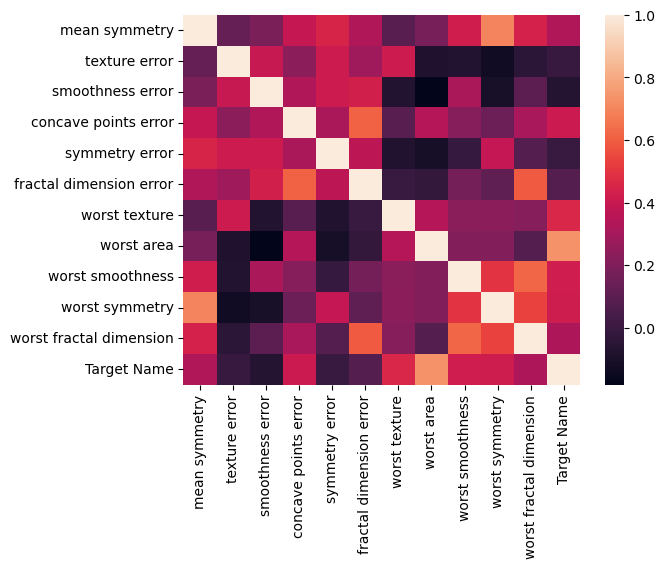

In [39]:
sns.heatmap(dataFrameBreastCancer.corr())

#####  7. Feature selection: Use scikit-learn's SelectKBest or SelectPercentile function to select the k best or top percentile features based on their correlation with the target variable.


In [40]:
# I have selected the K best select feature selection algorithm to select top 4 features. 
# this algorithm work on correction values between different columns, the columns which are highly correlated 
# are removed from dataset

In [41]:
dataFrameBreastCancer.columns

Index(['mean symmetry', 'texture error', 'smoothness error',
       'concave points error', 'symmetry error', 'fractal dimension error',
       'worst texture', 'worst area', 'worst smoothness', 'worst symmetry',
       'worst fractal dimension', 'Target Name'],
      dtype='object')

In [42]:
# split the data into 2 parts X and Y to train model

In [43]:
X_Cancer = dataFrameBreastCancer[['mean symmetry', 'texture error', 'smoothness error',
       'concave points error', 'symmetry error', 'fractal dimension error',
       'worst texture', 'worst area', 'worst smoothness', 'worst symmetry',
       'worst fractal dimension']]

In [44]:
Y_Cancer = dataFrameBreastCancer['Target Name']

In [45]:
X_Cancer.shape

(569, 11)

In [46]:
Y_Cancer.shape

(569,)

In [47]:
# split data in training and test set
X_train_cancer, X_test_cancer, y_train_cancer, y_test_cancer = train_test_split(
    X_Cancer, Y_Cancer, test_size=0.2, random_state=42)

In [48]:
print("Number of Features before SelectKBest === ", X_train_cancer.shape[1])

Number of Features before SelectKBest ===  11


In [49]:
# create object of selectKbest and train model
selectKBestObj = SelectKBest(k=4) 
# Default value of score_func is f_classif,  
# The default function only works with classification data.
selectKBestObj.fit(X_train_cancer, y_train_cancer)

SelectKBest(k=4)

In [50]:
KBestCoulmnIndexVal = selectKBestObj.get_support(indices= True)

In [51]:
dataFrameWithNewColumns = dataFrameBreastCancer.iloc[:,KBestCoulmnIndexVal]

In [52]:
# thus the final Dataframe after implementing KBestSelect algorithm
dataFrameWithNewColumns.columns

Index(['worst texture', 'worst area', 'worst smoothness', 'worst symmetry'], dtype='object')

In [53]:
### implement Logistic Regression classification algrithm to find Accuracy of model

In [54]:
X_train_cancer_new = dataFrameWithNewColumns[['worst texture', 'worst area', 'worst smoothness', 'worst symmetry']]

In [55]:
X_train_cancer_new.shape

(569, 4)

In [56]:
Y_Cancer.shape

(569,)

In [57]:
x_train,x_test,y_train,y_test = train_test_split(X_train_cancer_new,Y_Cancer, test_size=0.2)

In [58]:
LogisRegObject = LogisticRegression()

In [59]:
LogisRegObject.fit(x_train,y_train)

LogisticRegression()

In [60]:
y_Pred = LogisRegObject.predict(x_test)

In [61]:
accuracy_score(y_Pred,y_test) # thus the accuracy of this model is 93%

0.956140350877193